In [1]:
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
import numpy as np # linear algebra
import pandas as pd #data processing
import re
import seaborn as sns

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
print("Shape of Training data: ", train.shape)
print("Shape of Testing data: ", test.shape)

Shape of Training data:  (20800, 5)
Shape of Testing data:  (5200, 4)


In [4]:
class_labels  = train['label'].values.tolist()
class_labels_set = set(class_labels)

freq_list = []

for c in class_labels_set:
    freq_list.append(class_labels.count(c))

print ('Freq',freq_list)
print ('number',class_labels_set)

Freq [10387, 10413]
number {0, 1}


In [5]:
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("darkgrid")

C:\Users\Anusha\AppData\Local\Temp\ipykernel_22656\2336631955.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


<AxesSubplot: xlabel='label', ylabel='count'>

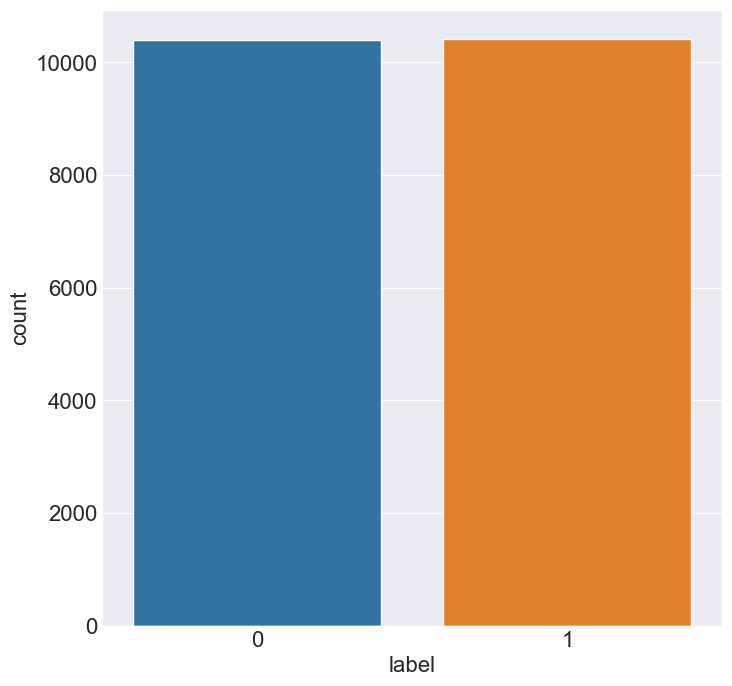

In [6]:
# plot the number of samples per class
import seaborn as sns
plt.figure(figsize=(8,8))
sns.countplot(x="label", data=train)

In [7]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [8]:
train.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [10]:
train.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

# Check number of NULL values in the dataset

In [12]:
# how many null values in the dataset
print("Null values in train data:")
print(train.isnull().sum())
print('\n\n')

print("Null values in test data:")
print(test.isnull().sum())

Null values in train data:
id           0
title      558
author    1957
text        39
label        0
dtype: int64



Null values in test data:
id          0
title     122
author    503
text        7
dtype: int64


<AxesSubplot: >

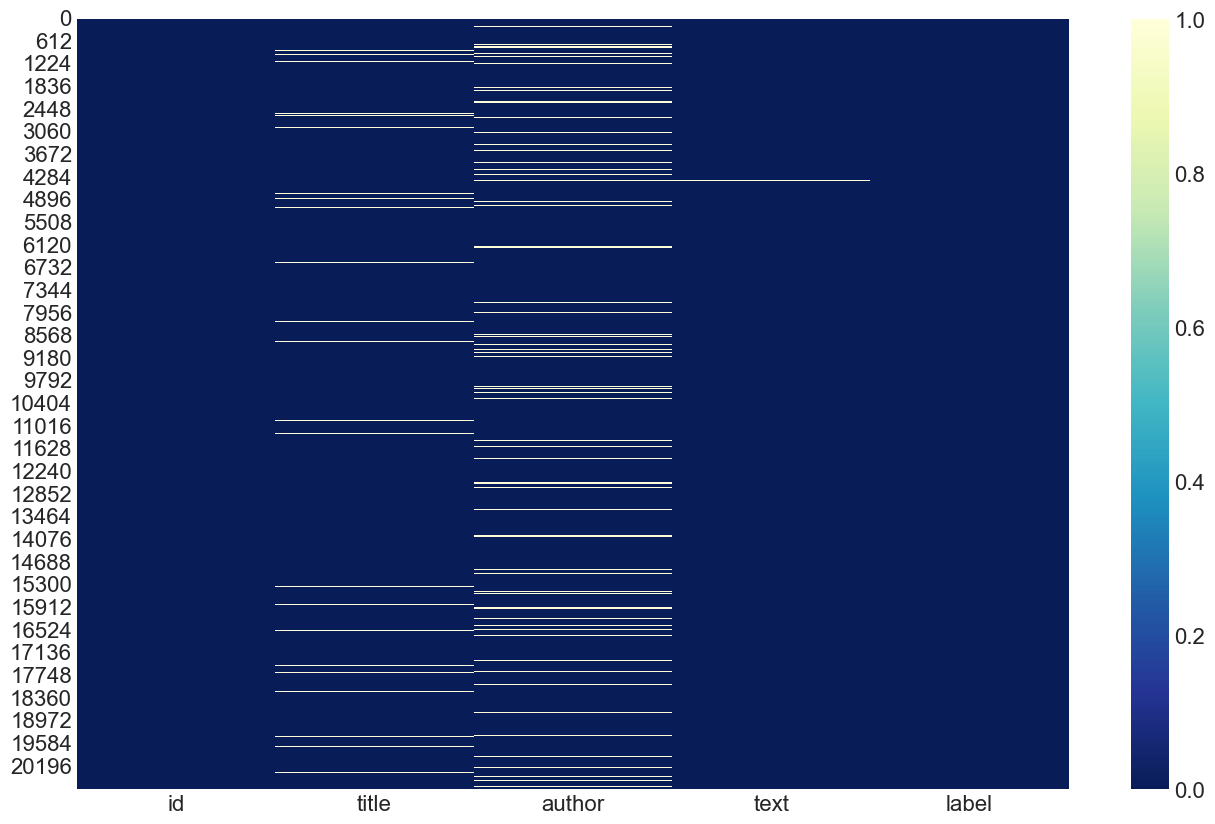

In [13]:
sns.heatmap(train.isnull(),cmap='YlGnBu_r')

In [14]:
print(train.dtypes)

id         int64
title     object
author    object
text      object
label      int64
dtype: object


# Missing data imputation

In [15]:
#imputing the data
test=test.fillna(' ') 
train=train.fillna(' ') 

the 920586
to 426276
of 418156
and 383023
in 311144
that 217827
is 156845
for 144756
on 130799
it 125228
with 102572
he 102434
was 101727
as 99072
said 80054
by 78684
are 73717
at 73574
have 72417
be 71739


<AxesSubplot: title={'center': 'Top 20 words in dataset before removing stop words'}, xlabel='text'>

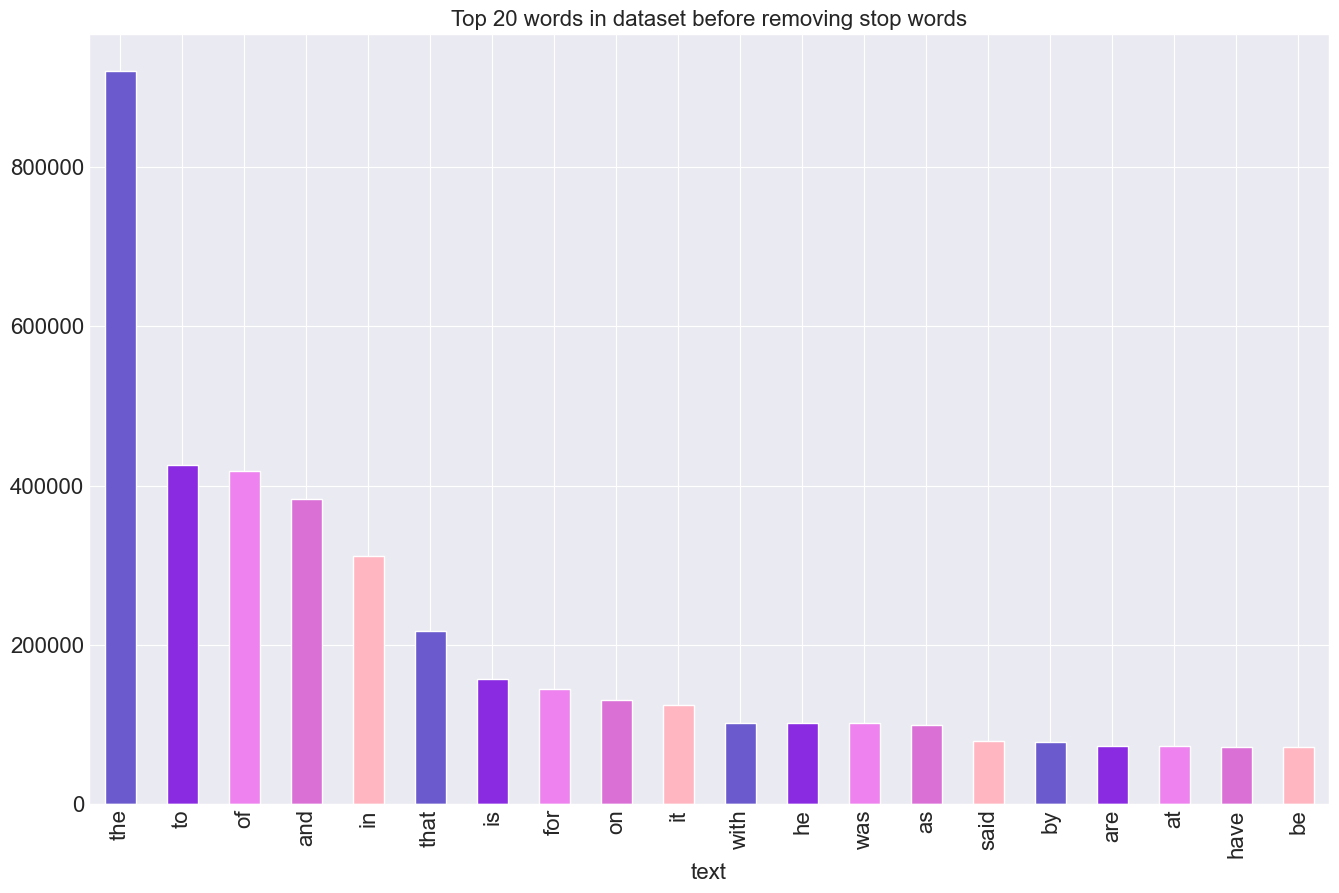

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(train['text'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df1.groupby('text').sum()['count'].sort_values(ascending=False).plot(
kind='bar', title='Top 20 words in dataset before removing stop words',color=['slateblue', 'blueviolet', 'violet', 'orchid', 'lightpink'])

of the 98832
in the 74589
to the 41825
on the 30767
and the 27043
for the 25451
that the 24536
to be 23122
at the 22979
with the 18952
from the 18169
by the 17674
mr trump 17341
it is 14755
he said 13319
the united 12730
it was 12454
united states 12371
one of 11490
has been 11352


<AxesSubplot: title={'center': 'Top 20 bigrams in dataset before removing stop words'}, xlabel='text'>

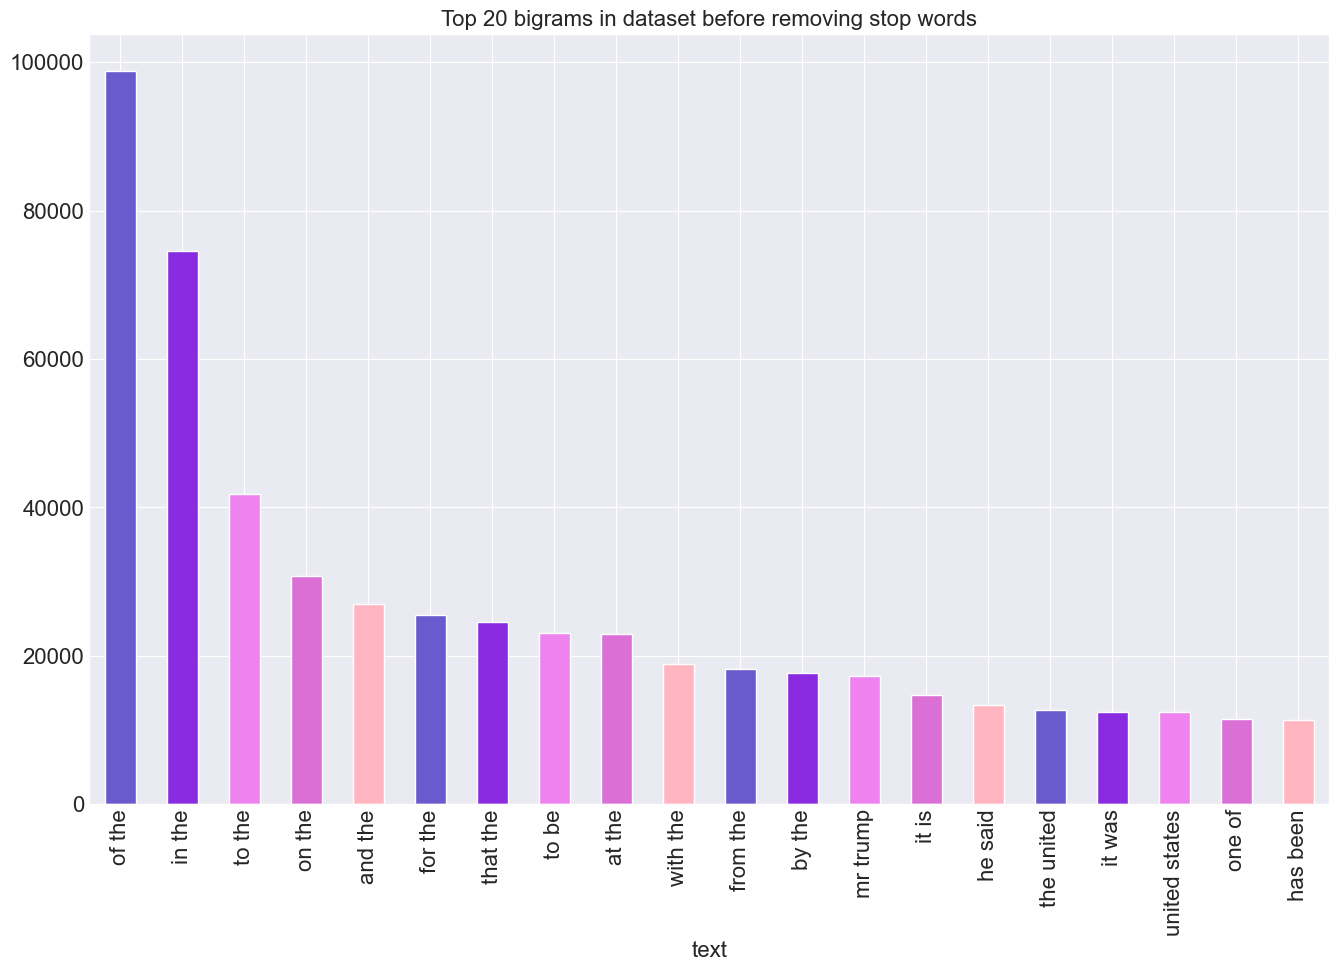

In [17]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(train['text'], 20)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df3.groupby('text').sum()['count'].sort_values(ascending=False).plot(
kind='bar', title='Top 20 bigrams in dataset before removing stop words',color=['slateblue', 'blueviolet', 'violet', 'orchid', 'lightpink'])

<AxesSubplot: title={'center': 'Number of True vs Fake News'}, ylabel='Frequency'>

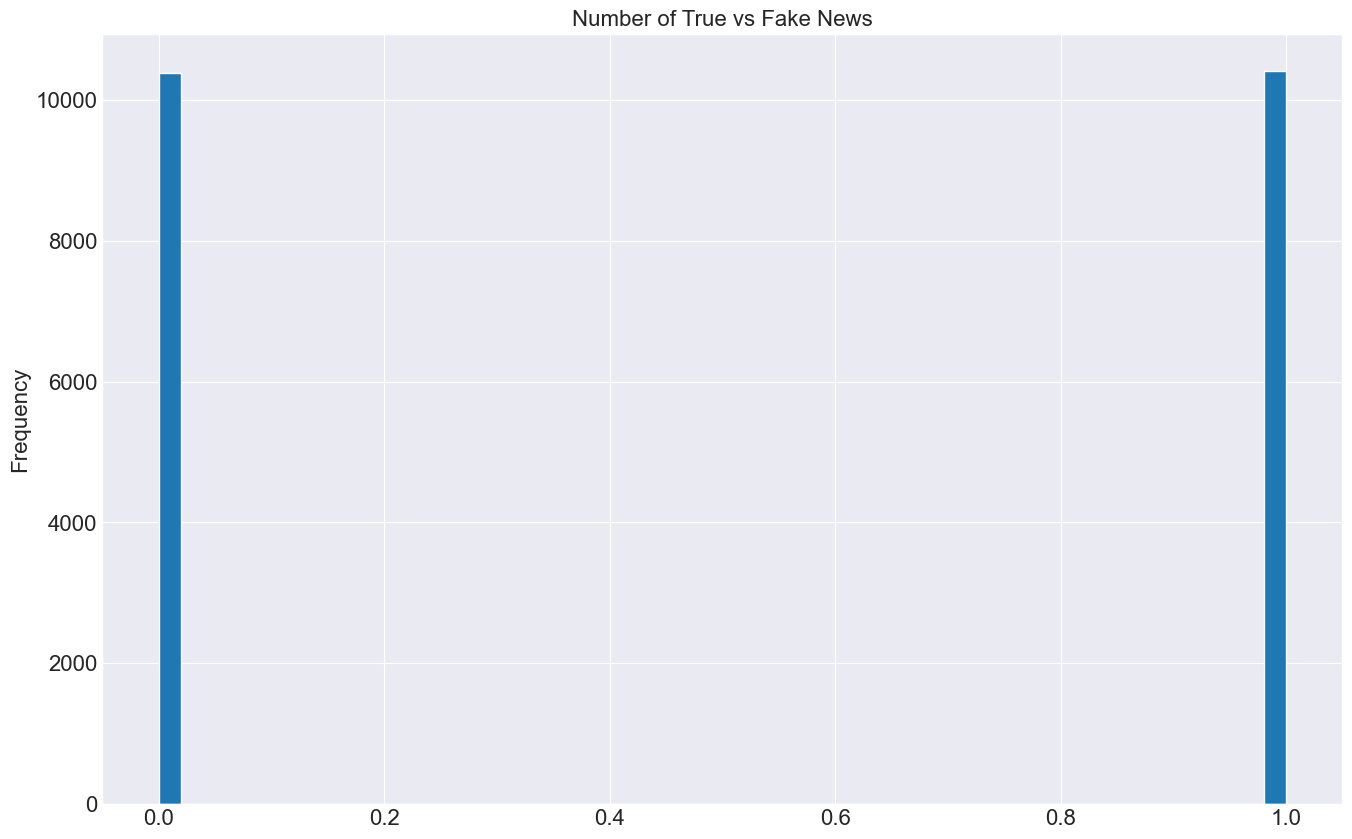

In [18]:
train['label'].plot(
    kind='hist',
    bins=50,
    title='Number of True vs Fake News')

# Merging the columns (title, author, text) into one column

In [19]:
test['total']=test['title']+' '+test['author']+test['text']
train['total']=train['title']+' '+train['author']+train['text']

In [20]:
train.head()

,id,title,author,text,label,total
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


In [21]:
test.head()

,id,title,author,text,total
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...","Specter of Trump Loosens Tongues, if Not Purse..."
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,#NoDAPL: Native American Leaders Vow to Stay A...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...","Tim Tebow Will Attempt Another Comeback, This ..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,Keiser Report: Meme Wars (E995) Truth Broadcas...


# Cleaning and preprocessing

# Regex

In [21]:
#Remove punctuations from the String  
sample = "!> NLP is $$ >^sh!!!o%%rt &&%$fo@@@r^^^&&!& >*Natural@# Language&&\ Pro@@@##%^^&cessing!@# %%$"

In [22]:
# what is gonna get selected we r gonna replace that with the empty string(2nd parameter)
sample = re.sub(r'[^\w\s]','',sample)

In [23]:
print(sample)

 NLP is  short for Natural Language Processing 


# Tokenization

In [24]:
import nltk
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [25]:
print("The NLTK tokeniser has tokenised \"Computers are not as great at understanding words as they are numbers.\" into a list of tokens ", end="\n\n")
print(nltk.word_tokenize("Computers are not as great at understanding words as they are numbers."))

The NLTK tokeniser has tokenised "Computers are not as great at understanding words as they are numbers." into a list of tokens 

['Computers', 'are', 'not', 'as', 'great', 'at', 'understanding', 'words', 'as', 'they', 'are', 'numbers', '.']


# StopWords

In [26]:
sample_text = "Does this thing really work? Lets see." 

In [27]:
print("Priniting all the different sentences in sample_text: ", end="\n\n")
for i in nltk.sent_tokenize(sample_text):
    print(i)

Priniting all the different sentences in sample_text: 

Does this thing really work?
Lets see.


In [28]:
words = nltk.word_tokenize(sample_text)

In [29]:
print("Priniting all the different words in sample_text: ", end="\n\n")
for i in nltk.word_tokenize(sample_text):
    print(i)

Priniting all the different words in sample_text: 

Does
this
thing
really
work
?
Lets
see
.


In [30]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [31]:
stop=stopwords.words("english")
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [32]:
clean_words = [w for w in words if not w in stop]

In [33]:
for i in clean_words:
    print(i)

Does
thing
really
work
?
Lets
see
.


In [34]:
words = nltk.word_tokenize(sample_text.lower())

In [35]:
clean_words = [w for w in words if not w in stop]
for i in clean_words:
    print(i)

thing
really
work
?
lets
see
.


In [36]:
import string
punctuations = list(string.punctuation)
print(punctuations)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [37]:
stop = stop + punctuations
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [38]:
clean_words = [w for w in words if not w in stop]
clean_words

['thing', 'really', 'work', 'lets', 'see']

# Lemmatization

In [39]:
from nltk.stem import WordNetLemmatizer
#Using WordNet lemmatizer
lemmatizer=WordNetLemmatizer()

input_str="Kites Babies Meeting Is Done Languages Cities Mice"

In [40]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [41]:
#Tokenize the sentence
input_str=nltk.word_tokenize(input_str)

In [42]:
import nltk
nltk.download('wordnet')

[nltk_data] Error loading wordnet: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [43]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() #need to tokenise the complee sentence

In [44]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Error loading omw-1.4: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [45]:
print("Below, see how kites->kite, babies->baby, languages -> language, cities -> city, mice -> mouse. Stemming couldn't have done this", end="\n\n")
#now each token i ll pass to he lemmatizer to see its reduced form
#Lemmatize each word
for word in input_str:
    print(lemmatizer.lemmatize(word).lower())

Below, see how kites->kite, babies->baby, languages -> language, cities -> city, mice -> mouse. Stemming couldn't have done this

kites
babies
meeting
is
done
languages
cities
mice


# Applying Text Preprocessing techniques discussed above on Train data


In [46]:
from nltk.stem import WordNetLemmatizer 
lemmatizer=WordNetLemmatizer()
for index,row in train.iterrows(): #taking he train data and iterating each row
    filter_sentence = ''
    
    sentence = row['total']
    sentence = re.sub(r'[^\w\s]','',sentence) 
    
    words = nltk.word_tokenize(sentence) #tokenizing the sentence
    
    words = [w for w in words if not w in stop]  #removing the stopwords
    
    #after removing the stopwords, applying the WornNet Lemmatizer
    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()
        
    # at the end, again putting the filter_sentence back into the training document at the same position    
    train.loc[index,'total'] = filter_sentence

said 80090
mr 66291
trump 47614
new 37077
people 36690
year 31742
like 26786
president 25134
time 24955
state 24849
clinton 23484
government 17869
day 17650
country 17583
say 16922
world 16241
american 15774
make 15376
news 15226
election 15121


<AxesSubplot: title={'center': 'Top 20 words in dataset after text-preprocessing'}, xlabel='total'>

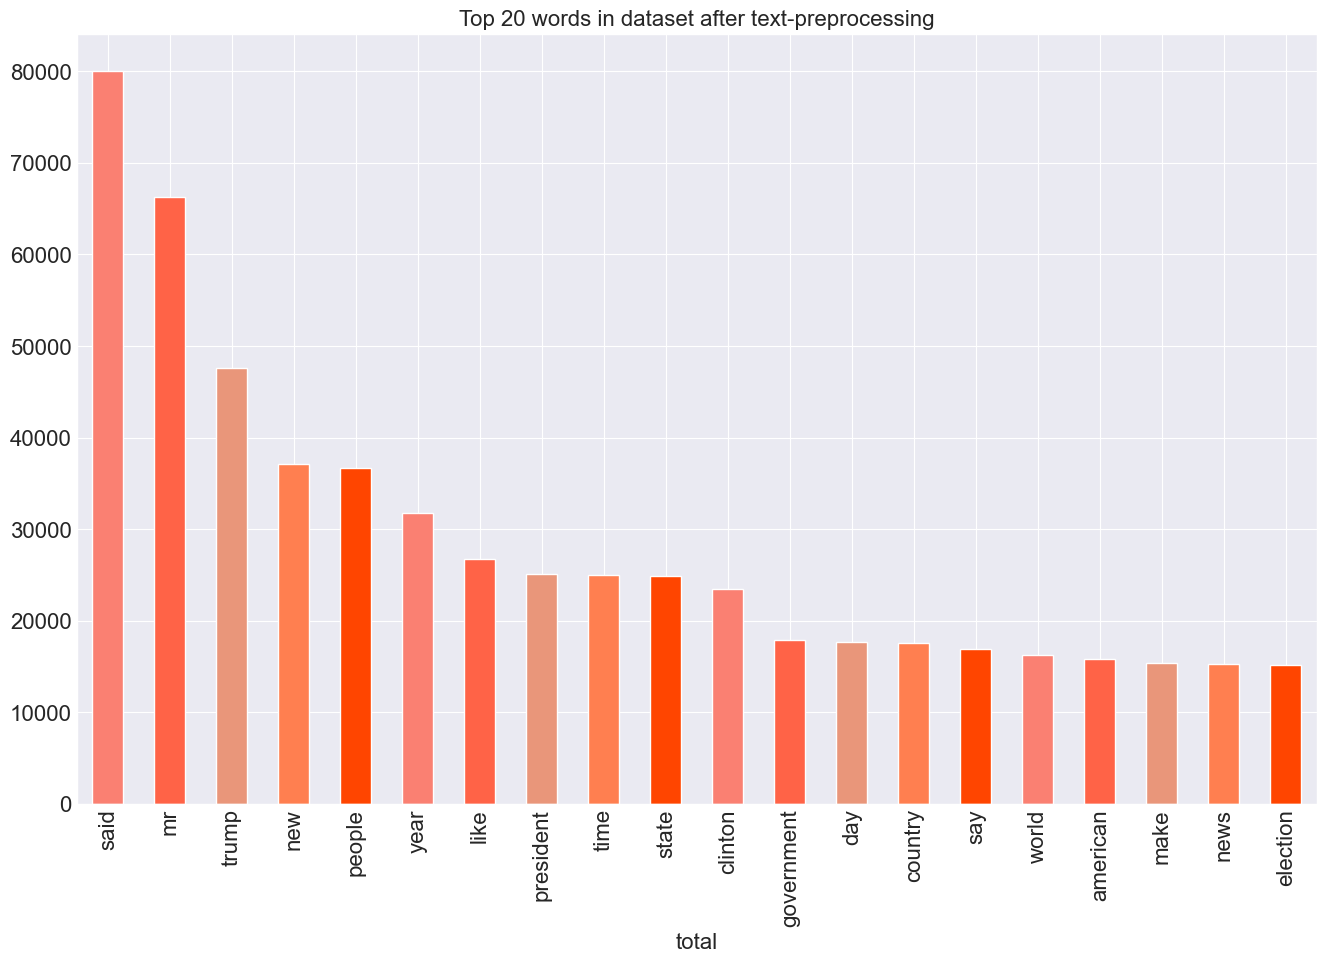

In [47]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(train['total'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['total' , 'count'])
df2.groupby('total').sum()['count'].sort_values(ascending=False).plot(
kind='bar', title='Top 20 words in dataset after text-preprocessing',color=['salmon', 'tomato', 'darksalmon', 'coral', 'orangered'])

new york 14704
mr trump 12360
united states 12356
york times 8943
donald trump 8533
hillary clinton 7338
white house 6128
mr trumps 4983
mrs clinton 3359
said mr 2696
year ago 2661
islamic state 2228
obama administration 2129
national security 2059
secretary state 1974
mr obama 1912
trump said 1869
president trump 1867
law enforcement 1865
social medium 1864


<AxesSubplot: title={'center': 'Top 20 bi-grams in dataset after text-preprocessing'}, xlabel='total'>

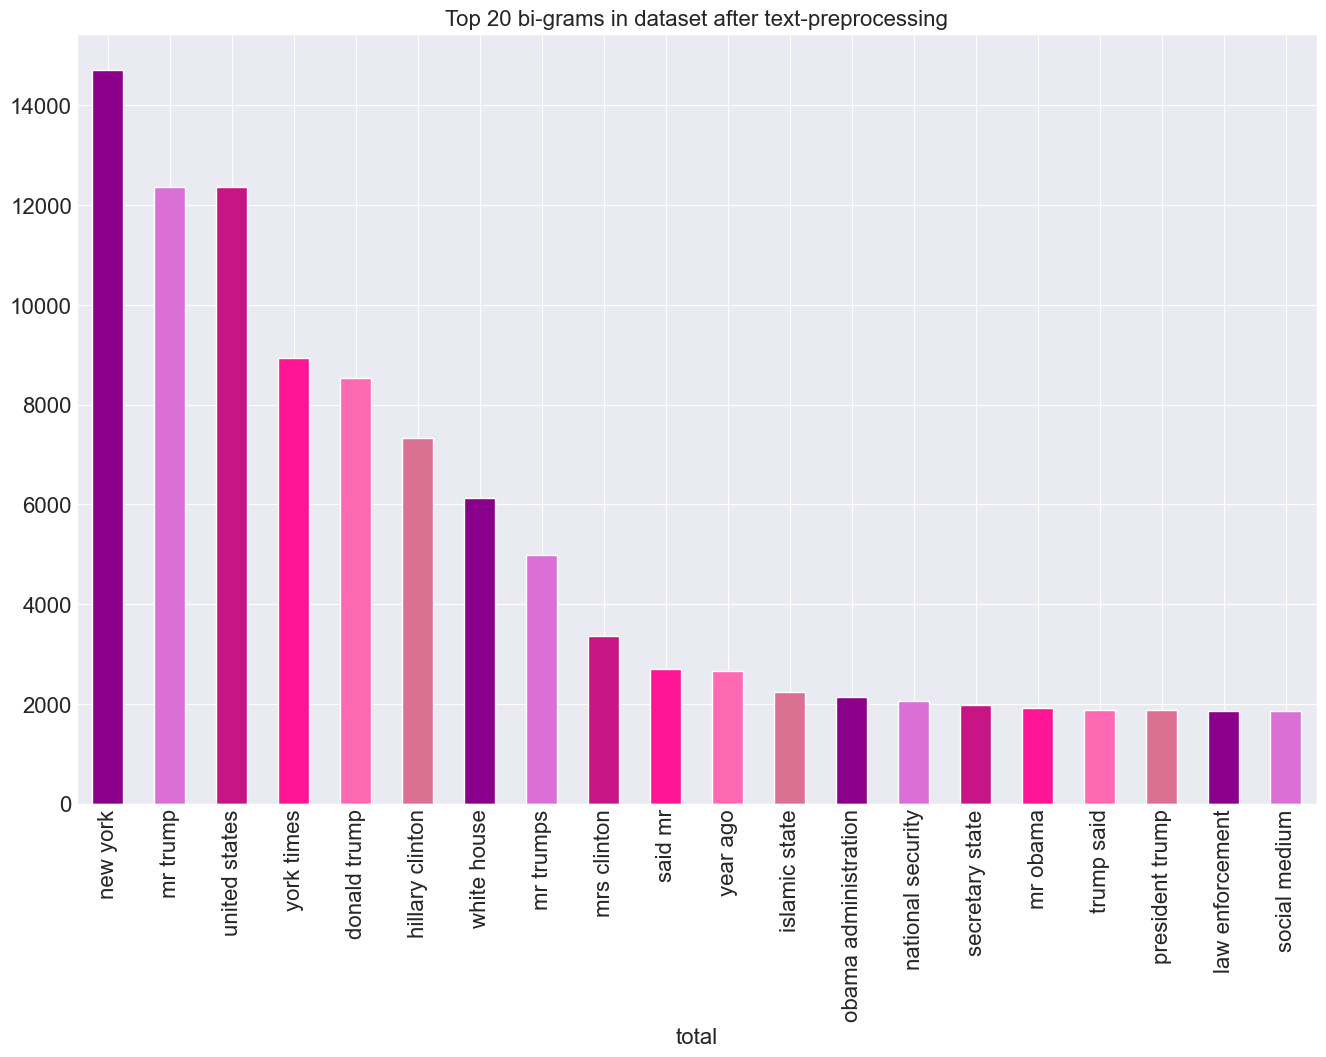

In [48]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(train['total'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['total' , 'count'])
df4.groupby('total').sum()['count'].sort_values(ascending=False).plot(
kind='bar', title='Top 20 bi-grams in dataset after text-preprocessing', color=['darkmagenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink', 'palevioletred'])

In [49]:
lis_text = [

    train[train['label'] == 0]['total'],
    train[train['label'] == 1]['total']
]

lis_title = [
    train[train['label'] == 0]['total'],
    train[train['label'] == 1]['total']
]

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
axes = axes.flatten()

for i, j in zip(lis_text, axes):
    try:
        new = i.str.split()
        new = new.values.tolist()
        corpus = [word.lower() for i in new for word in i]
        dic = defaultdict(int)
        for word in corpus:
            if word in stop:
                dic[word] += 1
     #   print(dic)
        top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:15]
        #   print(top)
        x, y = zip(*top)
        df = pd.DataFrame([x, y]).T
        df = df.rename(columns={0: 'Stopword', 1: 'Count'})
        sns.barplot(x='Count', y='Stopword', data=df, palette='plasma', ax=j)
        plt.tight_layout()
    except:
        plt.close()
        print('No stopwords left in texts.')
        break

No stopwords left in texts.


['trump', 'people', 'clinton', 'one', 'us', 'would', 'hillary', 'said', 'state', 'new', 'time', 'like', 'year', 'also', 'election', 'world', 'even', 'government', 'war', 'president', 'many', '2016', 'country', 'could'] [18004, 16748, 16682, 16379, 14830, 14506, 12264, 11875, 10844, 10749, 10556, 10378, 10363, 9912, 9752, 9356, 8823, 8646, 8509, 8032, 7955, 7924, 7579, 7514]


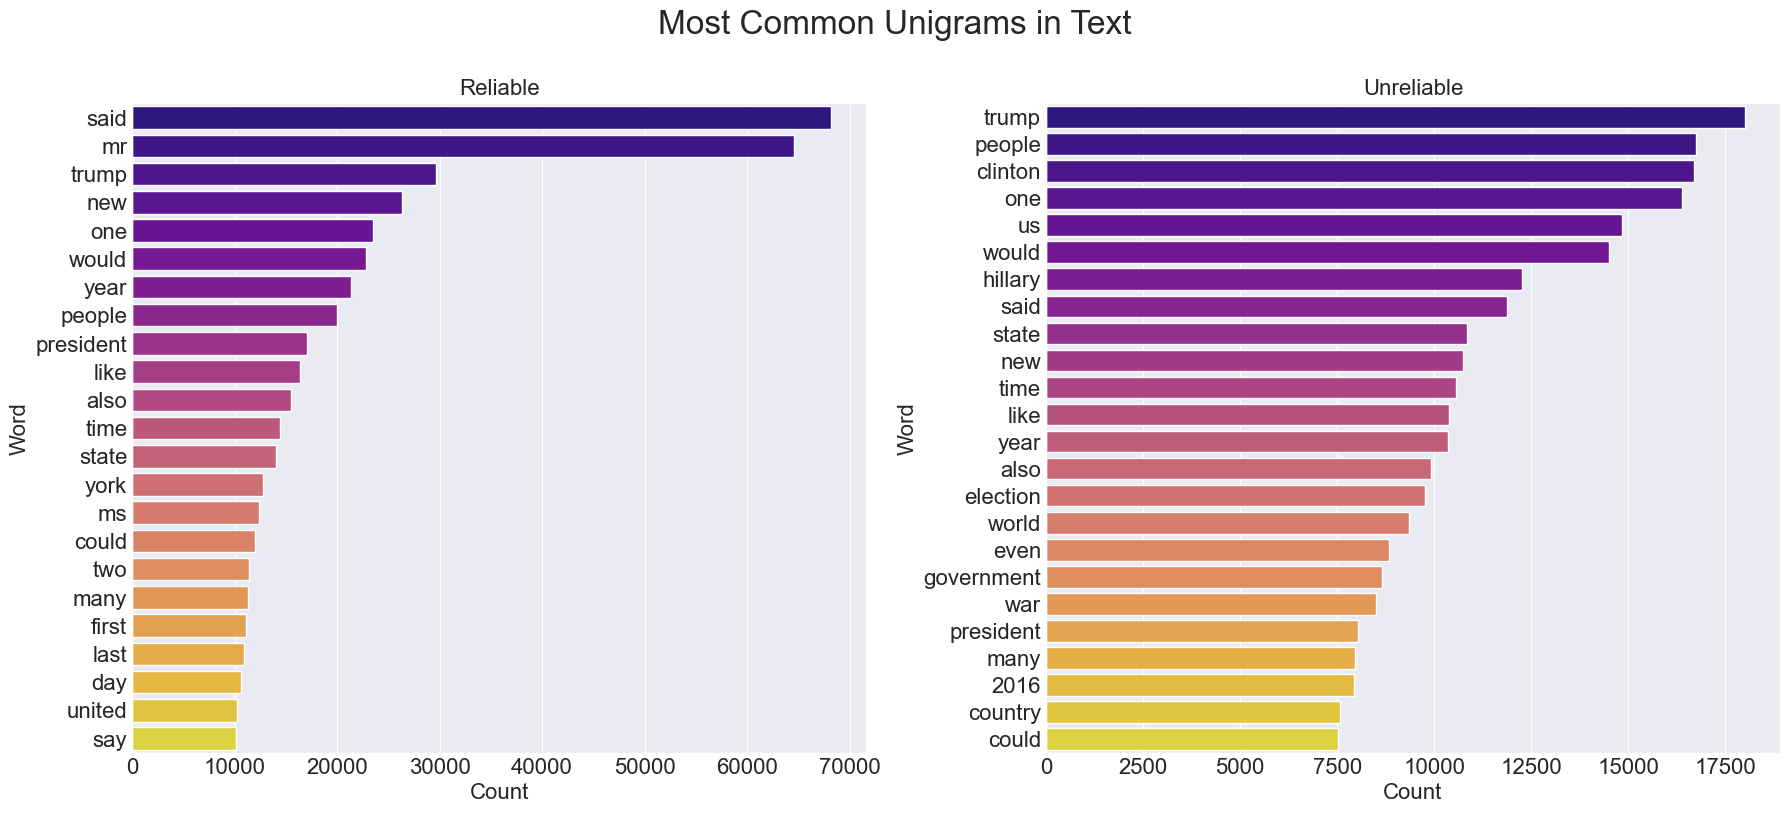

In [51]:
from collections import Counter, defaultdict

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
axes = axes.flatten()

for i, j in zip(lis_text, axes):

    new = i.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    counter = Counter(corpus)
    most = counter.most_common()
    x, y = [], []
    for word, count in most[:30]:
        if (word not in stop):
            x.append(word)
            y.append(count)


    sns.barplot(x=y, y=x, palette='plasma', ax=j)
print(x, y)
axes[0].set_title('Reliable')
axes[1].set_title('Unreliable')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Word')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Word')

fig.suptitle('Most Common Unigrams in Text', fontsize=24, va='baseline')
plt.tight_layout()

['trump', 'people', 'clinton', 'one', 'us', 'would', 'hillary', 'said', 'state', 'new', 'time', 'like', 'year', 'also', 'election', 'world', 'even', 'government', 'war', 'president', 'many', '2016', 'country', 'could'] [18004, 16748, 16682, 16379, 14830, 14506, 12264, 11875, 10844, 10749, 10556, 10378, 10363, 9912, 9752, 9356, 8823, 8646, 8509, 8032, 7955, 7924, 7579, 7514]


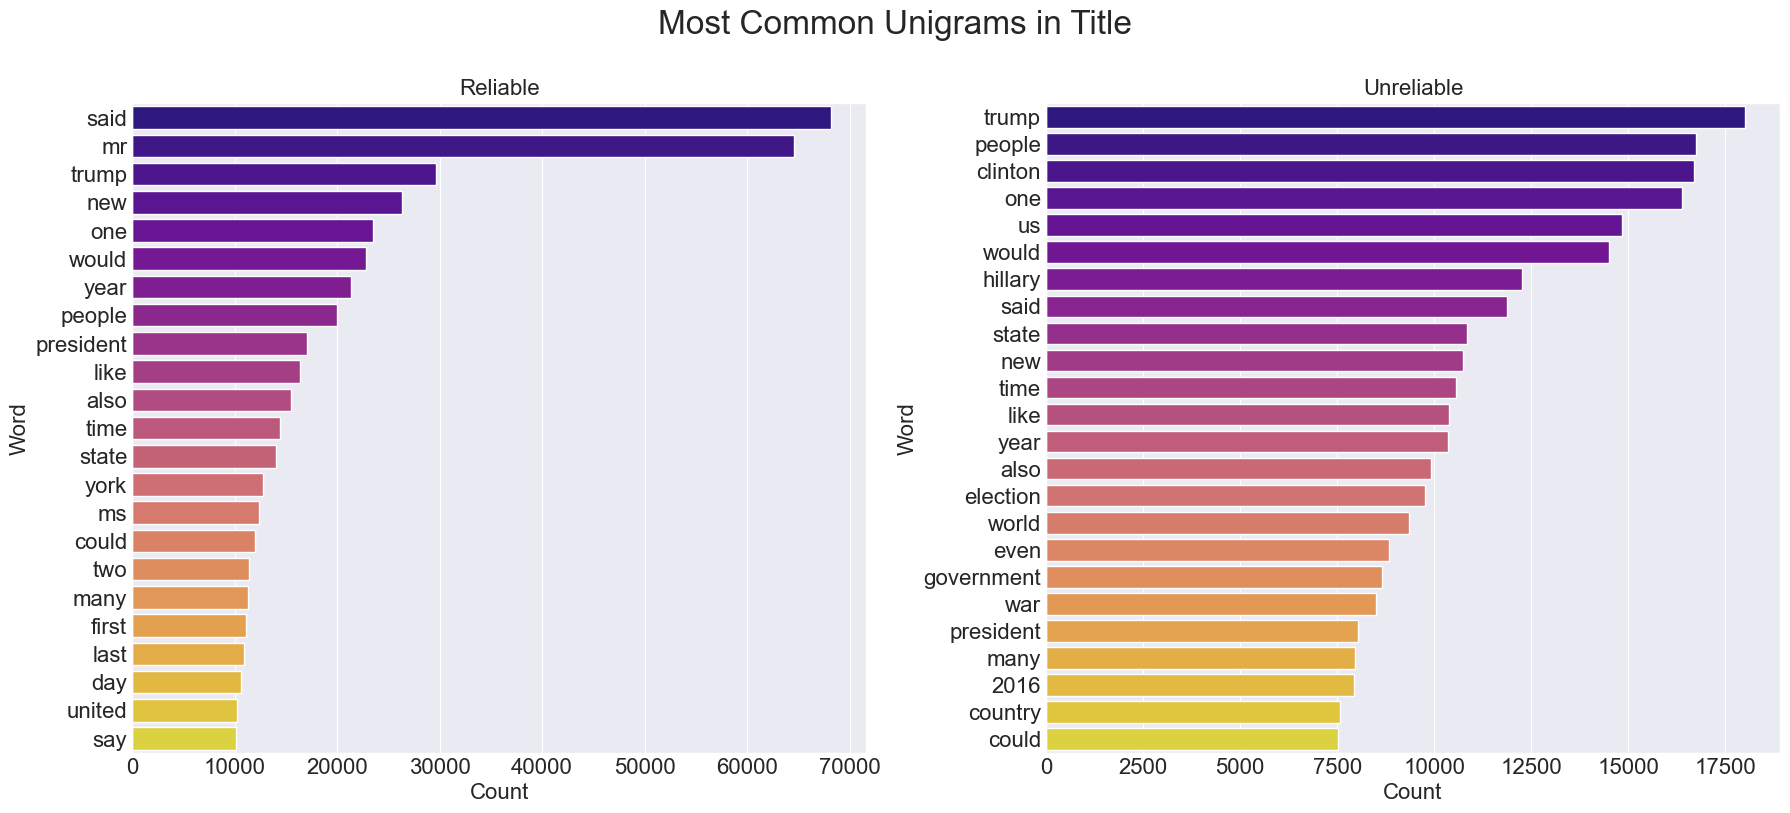

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
axes = axes.flatten()

for i, j in zip(lis_title, axes):

    new = i.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    counter = Counter(corpus)
    most = counter.most_common()
    x, y = [], []
    for word, count in most[:30]:
        if (word not in stop):
            x.append(word)
            y.append(count)


    sns.barplot(x=y, y=x, palette='plasma', ax=j)
print(x, y)
axes[0].set_title('Reliable')
axes[1].set_title('Unreliable')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Word')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Word')

fig.suptitle('Most Common Unigrams in Title', fontsize=24, va='baseline')
plt.tight_layout()

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
def ngrams(n, title, lis_type):
    """A Function to plot most common ngrams"""
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))
    axes = axes.flatten()
    for i, j in zip(lis_type, axes):

        new = i.str.split()
        new = new.values.tolist()
        corpus = [word for i in new for word in i]

        def _get_top_ngram(corpus, n=None):
            #getting top ngrams
            vec = CountVectorizer(ngram_range=(n, n),
                                  max_df=0.9,
                                  stop_words='english').fit(corpus)
            bag_of_words = vec.transform(corpus)
            sum_words = bag_of_words.sum(axis=0)
            words_freq = [(word, sum_words[0, idx])
                          for word, idx in vec.vocabulary_.items()]
            words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
            return words_freq[:15]

        top_n_bigrams = _get_top_ngram(i, n)[:15]
        x, y = map(list, zip(*top_n_bigrams))
        sns.barplot(x=y, y=x, palette='plasma', ax=j)
        
        axes[0].set_title('Reliable')
        axes[1].set_title('Unreliable')
        axes[0].set_xlabel('Count')
        axes[0].set_ylabel('Words')
        axes[1].set_xlabel('Count')
        axes[1].set_ylabel('Words')
        fig.suptitle(title, fontsize=24, va='baseline')
        plt.tight_layout()

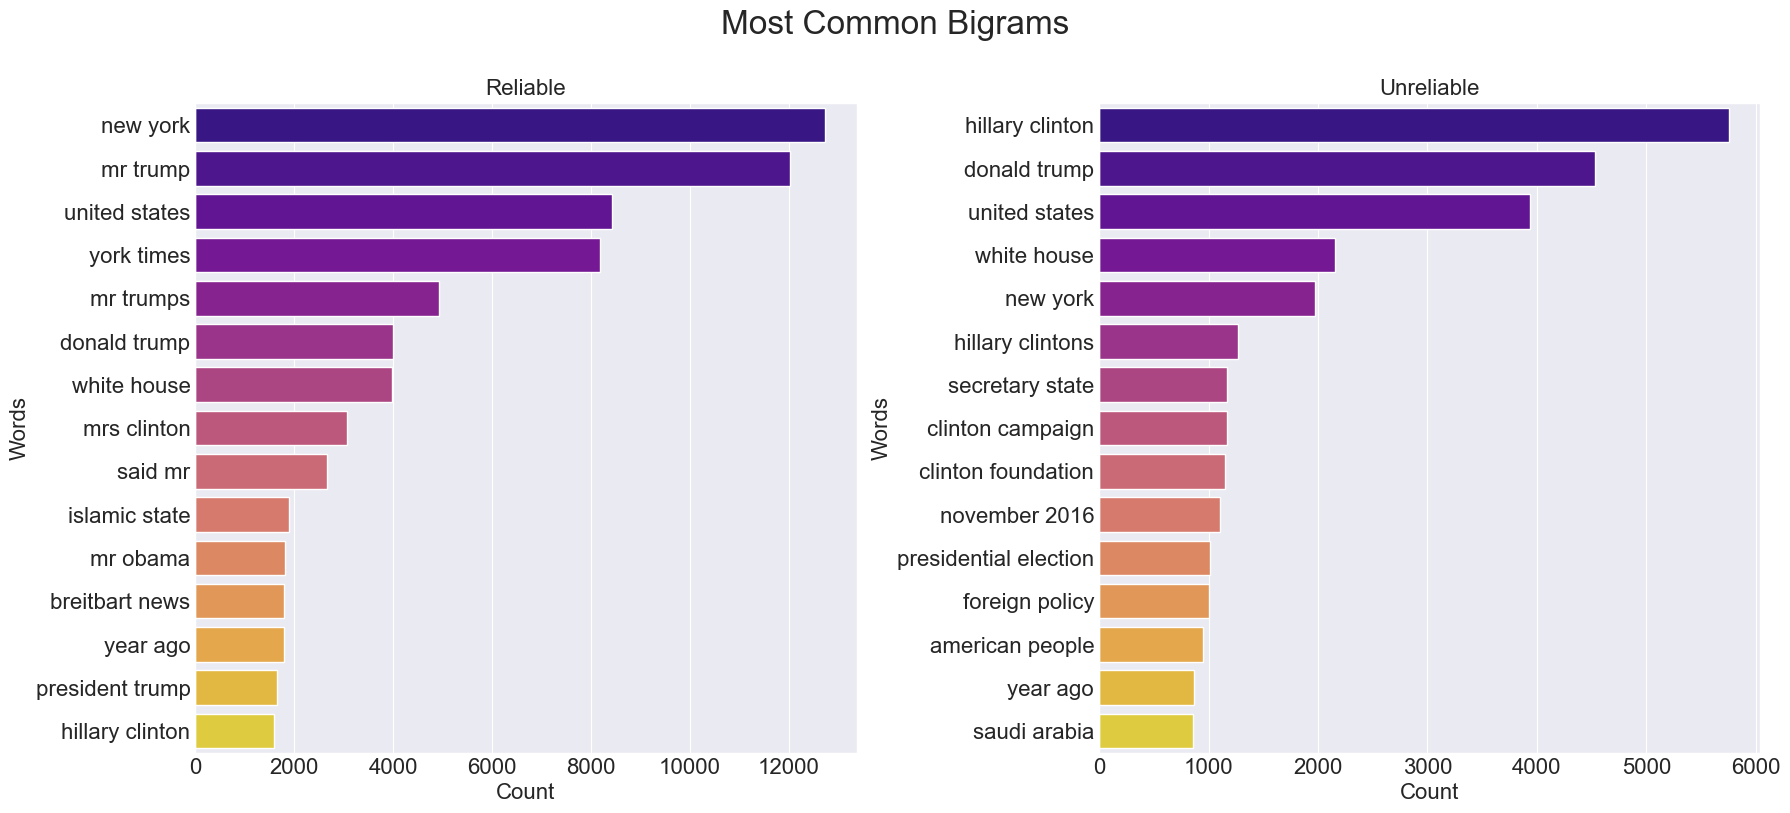

In [54]:
ngrams(2, 'Most Common Bigrams', lis_text)

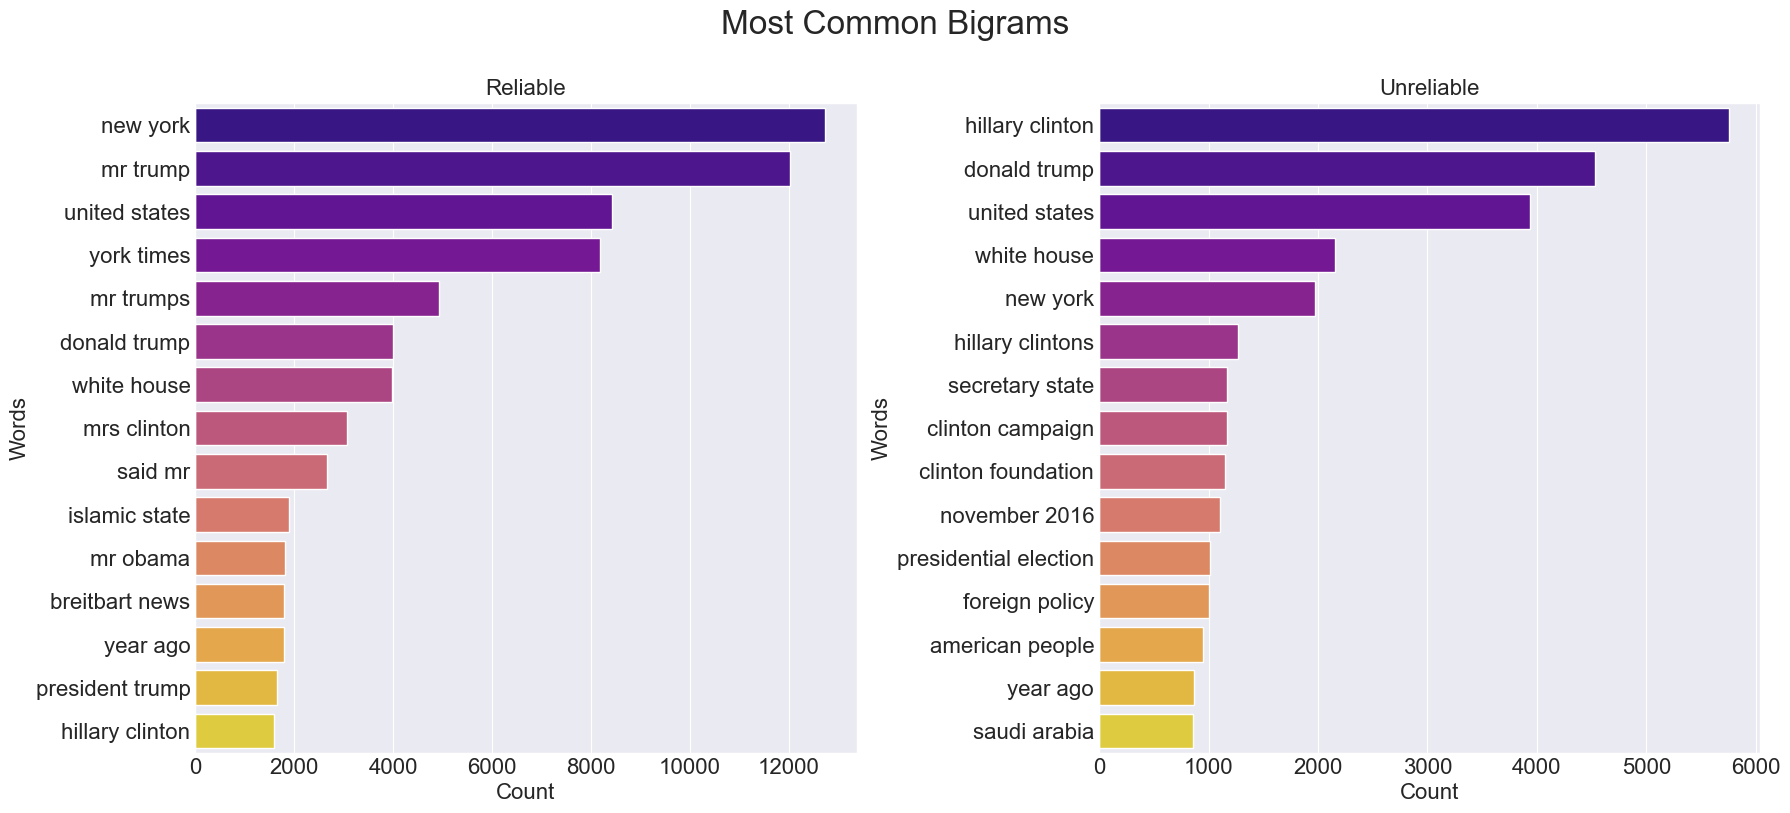

In [55]:
ngrams(2, 'Most Common Bigrams', lis_title)

In [56]:
train.head()

,id,title,author,text,label,total
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,house dem aide we didnt even see comeys lette...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,flynn hillary clinton big woman campus breitb...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,why truth might get you fired consortiumnewsc...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 civilians killed in single us airstrike ha...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,iranian woman jailed fictional unpublished st...


In [57]:
# Obtain the total words present in the dataset
list_of_words = []
for i in train.total:
    for j in i:
        list_of_words.append(j)

In [58]:
len(list_of_words)

68332444

In [59]:
# Obtain the total number of unique words
total_words = len(list(set(list_of_words)))
total_words

742

In [60]:
# dataframe information
train.info()
# check for null values
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20800 non-null  object
 2   author  20800 non-null  object
 3   text    20800 non-null  object
 4   label   20800 non-null  int64 
 5   total   20800 non-null  object
dtypes: int64(2), object(4)
memory usage: 975.1+ KB


id        0
title     0
author    0
text      0
label     0
total     0
dtype: int64

### We require only the following 2 columns now: 'total' --- holds the preprocessed text 'label' --- holds the predictions from where the machine will learn

In [61]:
train = train[['total','label']]
train.head()

,total,label
0,house dem aide we didnt even see comeys lette...,1
1,flynn hillary clinton big woman campus breitb...,0
2,why truth might get you fired consortiumnewsc...,1
3,15 civilians killed in single us airstrike ha...,1
4,iranian woman jailed fictional unpublished st...,1


# Count Vectorizer Demo

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
train_set = {"the sky is blue", "the sun is bright"}
count_vec = CountVectorizer(max_features = 3)
a = count_vec.fit_transform(train_set)
a.todense()

matrix([[1, 1, 1],
        [0, 1, 1]], dtype=int64)

In [63]:
count_vec.get_feature_names()

C:\Users\Anusha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['blue', 'is', 'the']

# Applying NLP Techniques

In [64]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [65]:
X_train = train['total']
Y_train = train['label']

## Bag-of-words / CountVectorizer

In [66]:
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

# in sklearn, we can import Bag of Words model through CountVectorizer. This works pretty much like Bag of words
# it is modified version of Bag of Words. It replaces the vector, instead of 1, w the frequency...

# we r making the object, vectorizer, of class/module CountVectorizer()
vectorizer = CountVectorizer()

In [67]:
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print("The above words are the unique words and consists of the feature set")

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
The above words are the unique words and consists of the feature set


In [68]:
print("The below matrix will show the frequency of the features in the feature set", end="\n\n")
X.todense()

The below matrix will show the frequency of the features in the feature set



matrix([[0, 1, 1, 1, 0, 0, 1, 0, 1],
        [0, 2, 0, 1, 0, 1, 1, 0, 1],
        [1, 0, 0, 1, 1, 0, 1, 1, 1],
        [0, 1, 1, 1, 0, 0, 1, 0, 1]], dtype=int64)

## TF-iDF Vectorizer

In [69]:
def vectorize_text(features, max_features):
    vectorizer = TfidfVectorizer( stop_words='english', #it will remove the englsh stopwords
                            decode_error='strict',
                            analyzer='word',
                            ngram_range=(1, 2), #single_words or 2words(bi-grams)
                            max_features=max_features
                            #max_df=0.5 # Verwendet im ML-Kurs unter Preprocessing                   
                            )
    feature_vec = vectorizer.fit_transform(features)
    return feature_vec.toarray()

In [70]:
tfidf_features = vectorize_text(['hello how are you doing','hi i am doing fine'],30) 
# 30 here is the number of max_features

In [71]:
print("creates some weight for all these words: ", end='\n\n')
tfidf_features

creates some weight for all these words: 



array([[0.44943642, 0.        , 0.        , 0.6316672 , 0.6316672 ,
        0.        , 0.        ],
       [0.33517574, 0.47107781, 0.47107781, 0.        , 0.        ,
        0.47107781, 0.47107781]])

### Applying Feature Extraction using count vectorization and tfidf 

In [ ]:
#Feature extraction using count vectorization and tfidf.
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X_train)
freq_term_matrix = count_vectorizer.transform(X_train)
tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

In [ ]:
print("10 feature names are:", end = '\n\n')
count_vectorizer.get_feature_names()[9000:9010]

In [ ]:
tf_idf_matrix

In [ ]:
#split in samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, Y_train, random_state=0)

In [ ]:
print(X_train.shape, y_train.shape)

In [ ]:
print(X_test.shape, y_test.shape)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5, random_state=110, max_iter=300)

In [ ]:
logreg.fit(X_train, y_train)

In [ ]:
pred = logreg.predict(X_test)

print('Accuracy of Logistic Regression on test set: {:.5f}'
     .format(logreg.score(X_test, y_test)))

In [ ]:
print(pred)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,pred))

In [ ]:
cm = confusion_matrix(y_test, pred)

ax = plt.subplot()
sns.set(font_scale=3.0) # Adjust to fit
sns.heatmap(cm, annot=True, ax=ax, cmap="coolwarm", fmt="g");  

# Labels, title and ticks
label_font = {'size':'18'}  # Adjust to fit
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('True labels', fontdict=label_font);

title_font = {'size':'21'}  # Adjust to fit
ax.set_title('Confusion Matrix for Logistic Regression on Fake News Dataset', fontdict=title_font);

ax.tick_params(axis='both', which='major', labelsize=10)  # Adjust to fit
ax.xaxis.set_ticklabels(['Real', 'Fake']);
ax.yaxis.set_ticklabels(['Real', 'Fake']);
plt.show()
plt.savefig('Logistic.png')

# MultinomialNB 

In [ ]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(X_train, y_train)
pred_NB = NB.predict(X_test)
print('Accuracy of MultinomialNB classifier on test set: {:.2f}'
     .format(NB.score(X_test, y_test)))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,pred_NB))

In [ ]:
cm = confusion_matrix(y_test, pred_NB)

ax = plt.subplot()
sns.set(font_scale=3.0) # Adjust to fit
sns.heatmap(cm, annot=True, ax=ax, cmap="bwr", fmt="g");  

# Labels, title and ticks
label_font = {'size':'18'}  # Adjust to fit
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('True labels', fontdict=label_font);

title_font = {'size':'21'}  # Adjust to fit
ax.set_title('Confusion Matrix for Multinomial Naive Bayes Classifier on Fake News Dataset', fontdict=title_font);

ax.tick_params(axis='both', which='major', labelsize=10)  # Adjust to fit
ax.xaxis.set_ticklabels(['Real', 'Fake']);
ax.yaxis.set_ticklabels(['Real', 'Fake']);
plt.show()
plt.savefig('MultinomialNB.png')

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
pred_dt = DT.predict(X_test)
DT.score(X_test, y_test)

In [ ]:
print(classification_report(y_test,pred_dt))

In [ ]:
cm = confusion_matrix(y_test, pred_dt)

ax = plt.subplot()
sns.set(font_scale=3.0) # Adjust to fit
sns.heatmap(cm, annot=True, ax=ax, cmap="seismic", fmt="g");  

# Labels, title and ticks
label_font = {'size':'18'}  # Adjust to fit
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('True labels', fontdict=label_font);

title_font = {'size':'21'}  # Adjust to fit
ax.set_title('Confusion Matrix for Decision Tree Classifier on Fake News Dataset', fontdict=title_font);

ax.tick_params(axis='both', which='major', labelsize=10)  # Adjust to fit
ax.xaxis.set_ticklabels(['Real', 'Fake']);
ax.yaxis.set_ticklabels(['Real', 'Fake']);
plt.show()
plt.savefig('DT.png')

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=50, criterion="entropy")
RFC.fit(X_train, y_train)
pred_RFC = RFC.predict(X_test)

In [ ]:
print(RFC.score(X_test, y_test))
print(classification_report(y_test, pred_RFC))

In [ ]:
cm = confusion_matrix(y_test, pred_RFC)

ax = plt.subplot()
sns.set(font_scale=3.0) # Adjust to fit
sns.heatmap(cm, annot=True, ax=ax, cmap="PuOr", fmt="g");  

# Labels, title and ticks
label_font = {'size':'18'}  # Adjust to fit
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('True labels', fontdict=label_font);

title_font = {'size':'21'}  # Adjust to fit
ax.set_title('Confusion Matrix for Random Forest Classifier on Fake News Dataset', fontdict=title_font);

ax.tick_params(axis='both', which='major', labelsize=10)  # Adjust to fit
ax.xaxis.set_ticklabels(['Real', 'Fake']);
ax.yaxis.set_ticklabels(['Real', 'Fake']);
plt.show()
plt.savefig('RandomForestClassifier.png')

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

In [ ]:
print(knn.score(X_test, y_test))
print(classification_report(y_test, pred_knn))

In [ ]:
cm = confusion_matrix(y_test, pred_knn)

ax = plt.subplot()
sns.set(font_scale=3.0) # Adjust to fit
sns.heatmap(cm, annot=True, ax=ax, cmap="Pastel1", fmt="g");  

# Labels, title and ticks
label_font = {'size':'18'}  # Adjust to fit
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('True labels', fontdict=label_font);

title_font = {'size':'21'}  # Adjust to fit
ax.set_title('Confusion Matrix for K-Nearest-Neighbours Classifier on Fake News Dataset', fontdict=title_font);

ax.tick_params(axis='both', which='major', labelsize=10)  # Adjust to fit
ax.xaxis.set_ticklabels(['Real', 'Fake']);
ax.yaxis.set_ticklabels(['Real', 'Fake']);
plt.show()
plt.savefig('K-Nearest-Neighbours1.png')

# SVM -Linear Kernel

In [ ]:
from sklearn import svm, metrics

svm_ = svm.SVC(kernel="linear")
svm_.fit(X_train, y_train)
pred_svm = svm_.predict(X_test)

In [ ]:
print(svm_.score(X_test, y_test))
print(classification_report(y_test, pred_svm))

In [ ]:
cm = confusion_matrix(y_test, pred_svm)

ax = plt.subplot()
sns.set(font_scale=3.0) # Adjust to fit
sns.heatmap(cm, annot=True, ax=ax, cmap="Paired", fmt="g");  

# Labels, title and ticks
label_font = {'size':'18'}  # Adjust to fit
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('True labels', fontdict=label_font);

title_font = {'size':'21'}  # Adjust to fit
ax.set_title('Confusion Matrix for SVM Classifier on Fake News Dataset', fontdict=title_font);

ax.tick_params(axis='both', which='major', labelsize=10)  # Adjust to fit
ax.xaxis.set_ticklabels(['Real', 'Fake']);
ax.yaxis.set_ticklabels(['Real', 'Fake']);
plt.show()
plt.savefig('SVM.png')

THE END